# Data Mining -  Advanced Data Analysis Exercise  

##### Student ID: 100489104

### TASK 1. DATA EXPLORATION AND VISUALIZATION

In [499]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Setup complete.")

Setup complete.


#### 1.1. Loading the data

In [236]:
data = pd.read_csv('Insurance_Data.csv')
print("Dataset shape:", data.shape)

Dataset shape: (5521, 83)


#### 1.2. Basic information about the dataset

In [239]:
print("\nFirst 5 rows:")
data.head()


First 5 rows:


,Customer_Type,Number_of_Houses,Avg_Household_Size,Avg_Age,Household_Profile,Married,Living_Together,Other_Relation,Singles,Household_Without_Children,...,Number_Family_Accident_Insurances,Number_Disability_Insurances,Number_Fire_Insurances,Number_Surfboard_Insurances,Number_Boat_Insurances,Number_Bicycle_Insurances,Number_Property_Insurances,Number_Social_Security_Insurances,Number_Mobile_Home_Policies,Mobile_Home_Policies
0,Rural & Low-income,1,3,30-40 years,Family with Grown-Ups,7,0,2,1,2,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
1,Rural & Low-income,1,2,30-40 years,Family with Grown-Ups,6,2,2,0,4,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
2,Rural & Low-income,1,2,30-40 years,Family with Grown-Ups,3,2,4,4,4,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
3,Middle-Class Families,1,3,40-50 years,Average Family,5,2,2,2,3,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy
4,Rural & Low-income,1,4,30-40 years,Farmers,7,1,2,2,4,...,0.0,0,1,0,0,0,0.0,0.0,0.0,No Policy


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 83 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Customer_Type                                    5521 non-null   object 
 1   Number_of_Houses                                 5521 non-null   int64  
 2   Avg_Household_Size                               5521 non-null   int64  
 3   Avg_Age                                          5507 non-null   object 
 4   Household_Profile                                5521 non-null   object 
 5   Married                                          5521 non-null   int64  
 6   Living_Together                                  5521 non-null   int64  
 7   Other_Relation                                   5521 non-null   int64  
 8   Singles                                          5521 non-null   int64  
 9   Household_Without_Children    

#### 1.3. Categorize features as numerical or categorical

In [348]:
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("Customer_Type")  # exclude target
print("Numerical Features:", len(numerical_cols))
print("Categorical Features:", len(categorical_cols))


Numerical Features: 76
Categorical Features: 6


#### 1.4. Statistical summary of numerical features

In [247]:
data[numerical_cols].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
Number_of_Houses,5521.0,1.111393,0.410128,1.0,1.0,1.0,1.0,10.0
Avg_Household_Size,5521.0,2.681217,0.790448,1.0,2.0,3.0,3.0,5.0
Married,5521.0,6.188372,1.902710,0.0,5.0,6.0,7.0,9.0
Living_Together,5521.0,0.883354,0.967486,0.0,0.0,1.0,1.0,7.0
Other_Relation,5521.0,2.285999,1.713935,0.0,1.0,2.0,3.0,9.0
Singles,5521.0,1.879732,1.794827,0.0,0.0,2.0,3.0,9.0
Household_Without_Children,5521.0,3.234559,1.619696,0.0,2.0,3.0,4.0,9.0
Household_With_Children,5521.0,4.302844,2.006947,0.0,3.0,4.0,6.0,9.0
High_Education_Level,5521.0,1.459699,1.615106,0.0,0.0,1.0,2.0,9.0
Medium_Education_Level,5521.0,3.355733,1.764348,0.0,2.0,3.0,4.0,9.0


#### 1.5. Summary of features (data types, missing values and outliers)

##### Step 1: Create a summary DataFrame

In [251]:
feature_summary = pd.DataFrame({
    'Data type': data.dtypes,
    'Count': data.count(),
    'Missing values': data.isnull().sum(),
    'Missing (%)': (data.isnull().sum() / len(data) * 100).round(2),
    'Unique values': data.nunique()
})

##### Step 2: Missing Values info

In [256]:
feature_summary[feature_summary['Missing values'] > 0] #show columns with onlu missing values

,Data type,Count,Missing values,Missing (%),Unique values
Avg_Age,object,5507,14,0.25,6
Private_Third_Party_Insurance_Contribution,object,5512,9,0.16,4
Delivery_Van_Policy_Contribution,float64,5502,19,0.34,4
Trailer_Policy_Contribution,float64,5502,19,0.34,6
Moped_Policy_Contribution,float64,5469,52,0.94,374
Life_Insurance_Contribution,float64,5461,60,1.09,280
Private_Accident_Insurance_Contribution,float64,5469,52,0.94,30
Family_Accident_Insurance_Contribution,float64,5469,52,0.94,34
Disability_Insurance_Contribution,float64,5449,72,1.30,23
Fire_Insurance_Contribution,float64,5466,55,1.00,2963


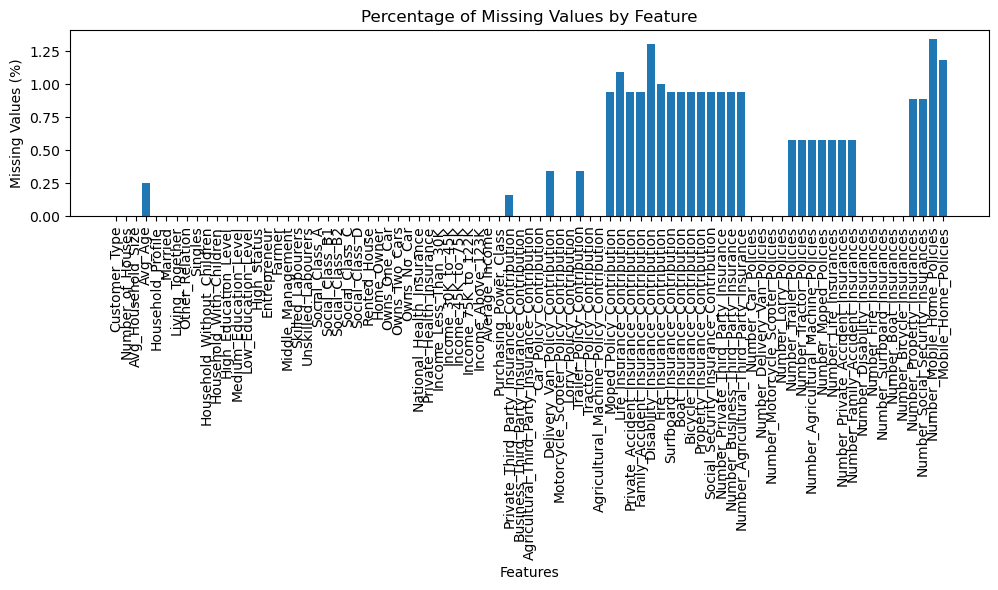

In [516]:
    plt.figure(figsize=(10, 6))
    plt.bar(feature_summary.index, feature_summary['Missing (%)'])
    plt.title('Percentage of Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Missing Values (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

##### Step 3: Detect outliers in numerical features

In [428]:
# Identify outliers itself
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
# Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    return {
        'Column': column,
        'Outliers Count': len(outliers),
        'Percentage (%)': (len(outliers) / len(df) * 100)
    }

# Create DataFrame with outliers information
outliers_df = pd.DataFrame(outliers_summary)
outliers_df.sort_values('Outliers Count', ascending=False).head(10)  # Show top 10

,Column,Outliers Count,Percentage (%)
33,Income_Above_123K,879,15.921029
34,Average_Income,615,11.139286
0,Number_of_Houses,528,9.563485
32,Income_75K_to_122K,461,8.349937
18,Social_Class_B1,407,7.371853
43,Moped_Policy_Contribution,373,6.756022
64,Number_Moped_Policies,372,6.737910
75,Number_Mobile_Home_Policies,328,5.940953
13,Farmer,289,5.234559
44,Life_Insurance_Contribution,279,5.053432


#### 1.6. Key distribution

##### Step 1: Target variable distribution

In [265]:
target_distribution = pd.DataFrame({
    'Count': data['Customer_Type'].value_counts(),
    'Percentage (%)': (data['Customer_Type'].value_counts(normalize=True) * 100).round(2)
})
target_distribution


,Count,Percentage (%)
Customer_Type,,
Rural & Low-income,2378,43.07
Middle-Class Families,1203,21.79
Seniors & Retired,675,12.23
Young & Low-income,638,11.56
Wealthy & Affluent,627,11.36


##### Step 2: Plot target distribution

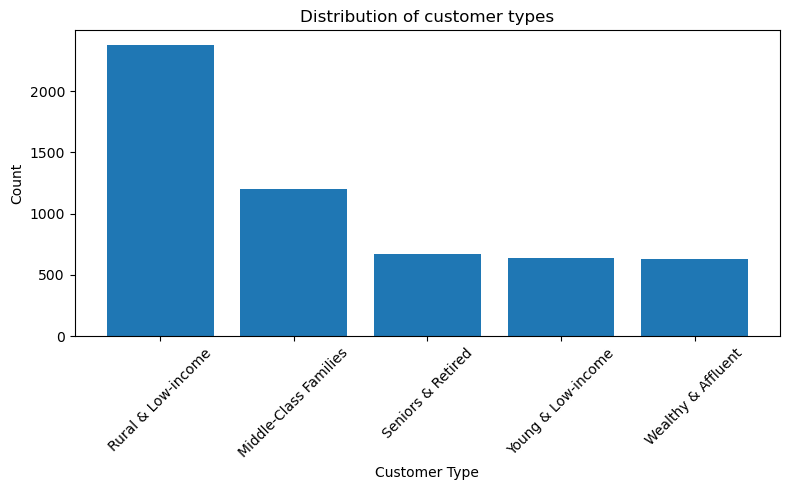

In [610]:
plt.figure(figsize=(8, 5))
plt.bar(target_distribution.index, target_distribution['Count'])
plt.title('Distribution of customer types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

##### Step 3: Plot of our main key feature in our case average_income

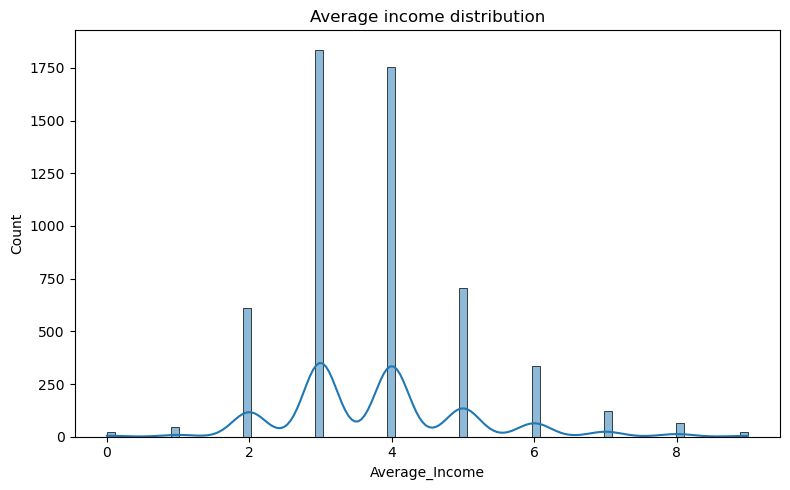

In [271]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Average_Income'], kde=True)
plt.title('Average income distribution')
plt.tight_layout()

#### 1.7. Relationship between target and key feature

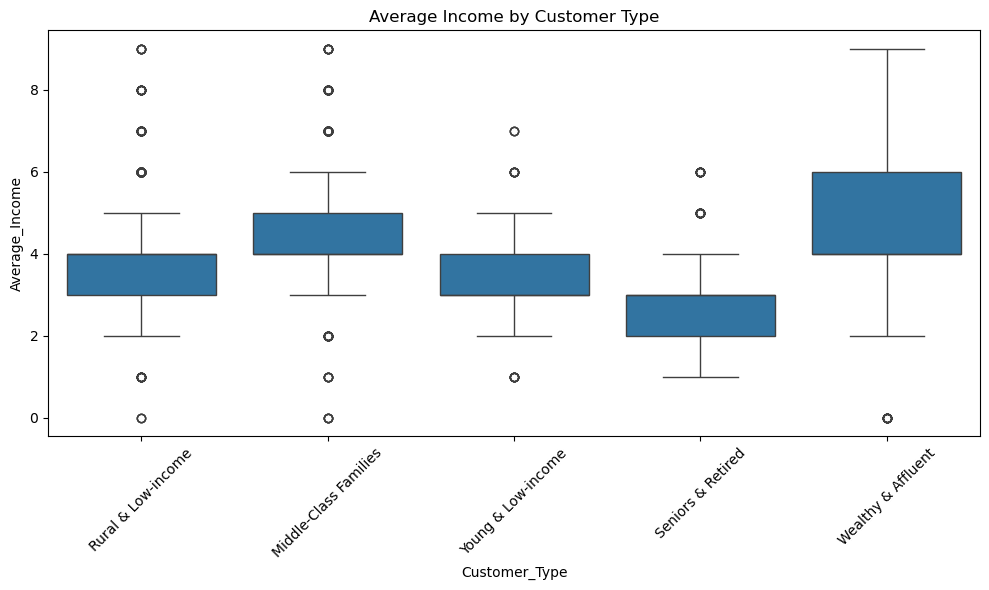

In [617]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Type', y='Average_Income', data=data)
plt.title('Average Income by Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('key_feature.png')

### TASK 2.  DATA CLEANSING, FEATURE ENGINEERING, AND PRE-PROCESSING

#### 2.1.  Handle missing values

##### Step 1: Check total missing values 

In [278]:
missing_before = data.isnull().sum().sum()
print(f"Total missing values before imputation: {missing_before}")

Total missing values before imputation: 1281


##### Step 2: Fix missing values

In [284]:
# Since there are no columns with> 60% missing values,i impute them rather than drop

# For numerical columns,i use median imputation
for col in numerical_cols:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# For categorical columns,i use mode
for col in categorical_cols:
    if not data[col].mode().empty:
        mode_value = data[col].mode()[0]
        data[col] = data[col].fillna(mode_value)
    else:
        data[col] = data[col].fillna("Unknown")

##### Step 3: Verify missing values are handled

In [286]:
missing_after = data.isnull().sum().sum()
print(f"Missing values after imputation: {missing_after}")


Missing values after imputation: 0


#### 2.2. Check for duplicates

In [320]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

Number of duplicate rows: 327
Removed 327 duplicate rows


#### 2.3. Identify and handle high correlation features

##### Step 1: Before correlation visualization

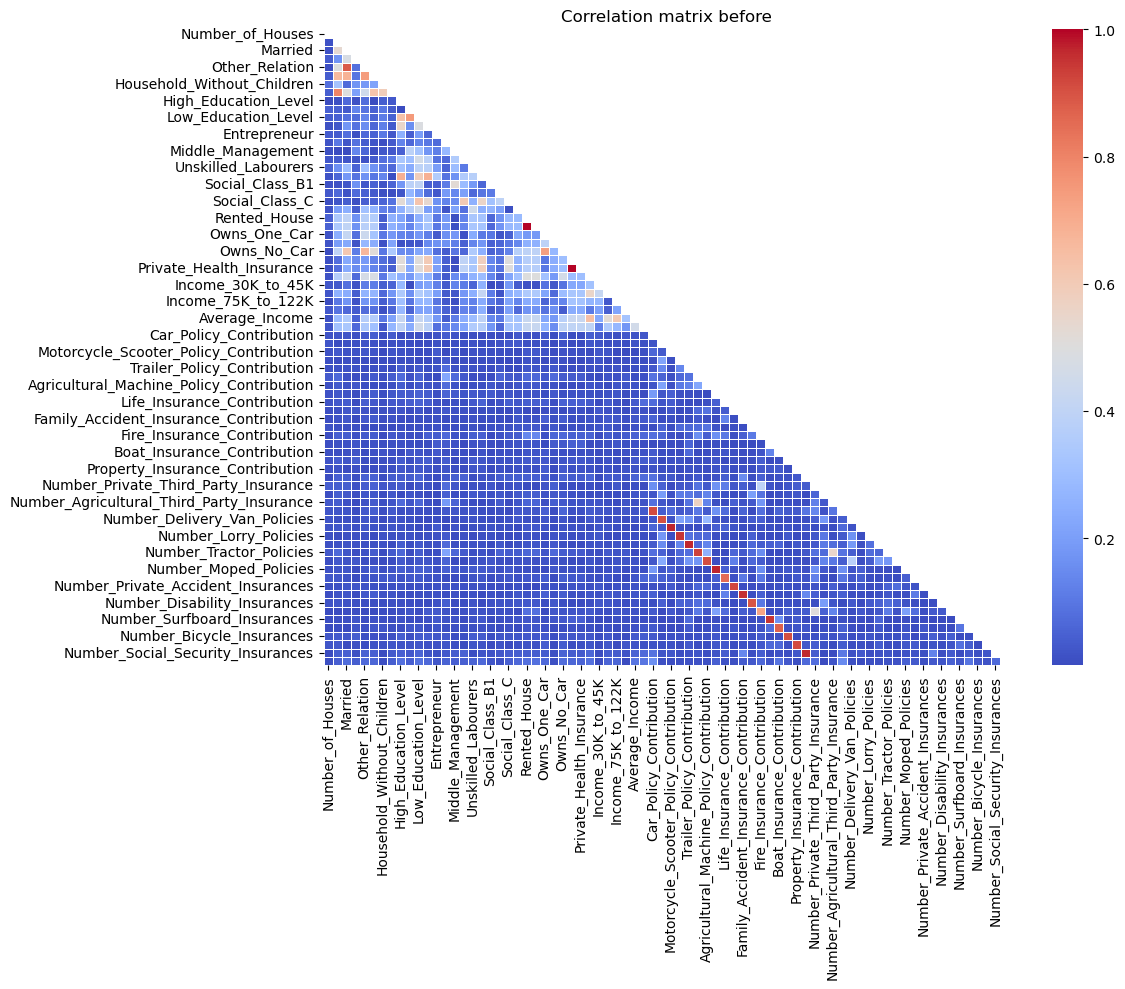

In [329]:
# Step 2: Before correlation visualization
plt.figure(figsize=(12, 10))
correl_before = data[numerical_cols].corr().abs()
mask = np.triu(np.ones_like(correl_before, dtype=bool))
sns.heatmap(correl_before, mask=mask, cmap='coolwarm', annot=False,
           linewidths=0.5, vmax=1.0)
plt.title('Correlation matrix before')
plt.tight_layout()
plt.savefig('correlation_before.png')

##### Step 2: Remove highly correlated features (>0.8)

In [332]:
upper = correl_before.where(np.triu(np.ones(correl_before.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.8)]
print(f"Highly correlated features to remove: {len(high_corr_cols)}")
data_cleaned = data.drop(columns=high_corr_cols)

Highly correlated features to remove: 20


##### Step 3: After correlation visualization

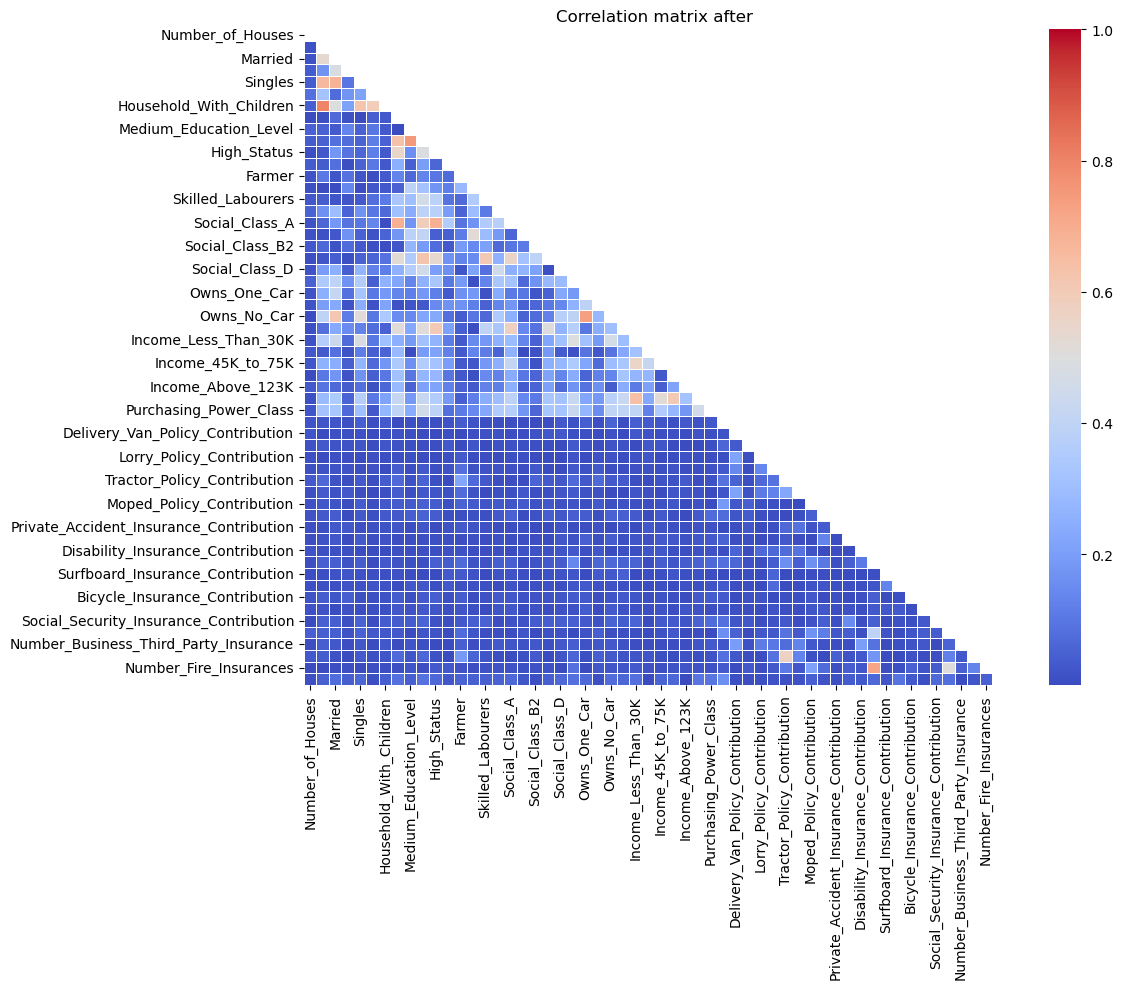

In [334]:
numerical_cols_after = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 10))
correl_after = data_cleaned[numerical_cols_after].corr().abs()
mask_after = np.triu(np.ones_like(correl_after, dtype=bool))
sns.heatmap(correl_after, mask=mask_after, cmap='coolwarm', annot=False,
           linewidths=0.5, vmax=1.0)
plt.title('Correlation matrix after')
plt.tight_layout()
plt.savefig('correlation_after.png') 


#### 2.4. Feature engineering

##### Step 1: Create a total policy feature

In [343]:
total_policy_cols = [col for col in data_cleaned.columns if 'Number_' in col and 'Houses' not in col]
data_cleaned['Total_Policies'] = data_cleaned[total_policy_cols].sum(axis=1)

##### Step 2: Visualization of the feature

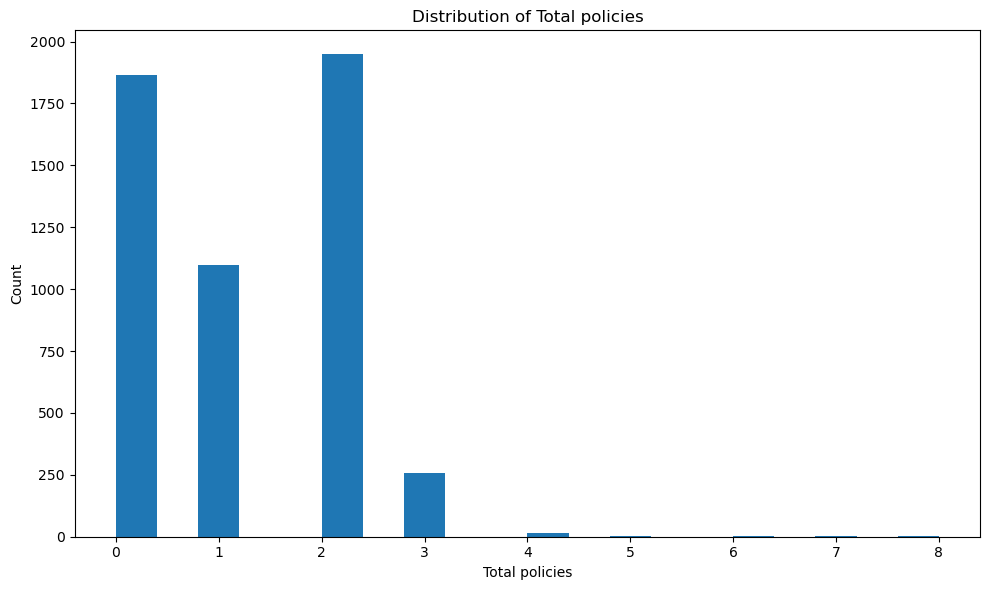

In [346]:
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Total_Policies'], bins=20)
plt.title('Distribution of Total policies')
plt.xlabel('Total policies')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('total_policies.png')


### TASK 3.  SUPERVISED MODEL TRAINING, TUNING, AND EVALUATION 

#### 3.1. Encode categorical columns into numeric values before train models

In [435]:
# Step 1: One-Hot Encoding of categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Step 2: Encode the target variable
target_le = LabelEncoder()
data_encoded["Customer_Type"] = target_le.fit_transform(data_encoded["Customer_Type"])

#### 3.2. Split the data into a training set and a validation set

In [435]:
# Step 1: Define features and target
X = data_encoded.drop("Customer_Type", axis=1)
y = data_encoded["Customer_Type"]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### 3.3. Model training/ Tuning/ Prediction/ Evaluation

##### 3.3.1. Decision tree

##### Step 1: Train

In [354]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### Step 2: Predict and evaluate (confusion matrix)

In [392]:
y_pred_dt = dt_model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=target_le.classes_))

Classification Report:

                       precision    recall  f1-score   support

Middle-Class Families       0.99      0.95      0.97       228
   Rural & Low-income       1.00      1.00      1.00       440
    Seniors & Retired       0.99      0.97      0.98       128
   Wealthy & Affluent       0.93      0.99      0.96       121
   Young & Low-income       0.94      0.98      0.96       122

             accuracy                           0.98      1039
            macro avg       0.97      0.98      0.97      1039
         weighted avg       0.98      0.98      0.98      1039



<Figure size 800x600 with 0 Axes>

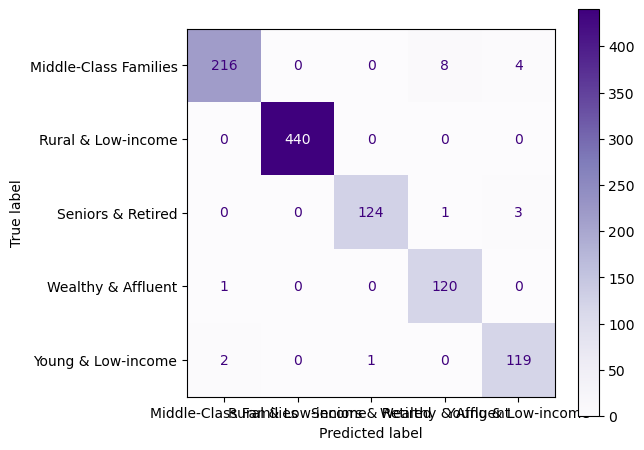

<Figure size 640x480 with 0 Axes>

In [476]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_le.classes_)
disp.plot(cmap="Purples", values_format='d')
plt.tight_layout()
plt.show()
plt.savefig('cm1.png')

##### 3.3.2. k-NN 

##### Step 1: Train with GridSearchCV

In [398]:
param_grid = {'n_neighbors': list(range(3, 12))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)


##### Step 2: Predict and evaluate for ROC

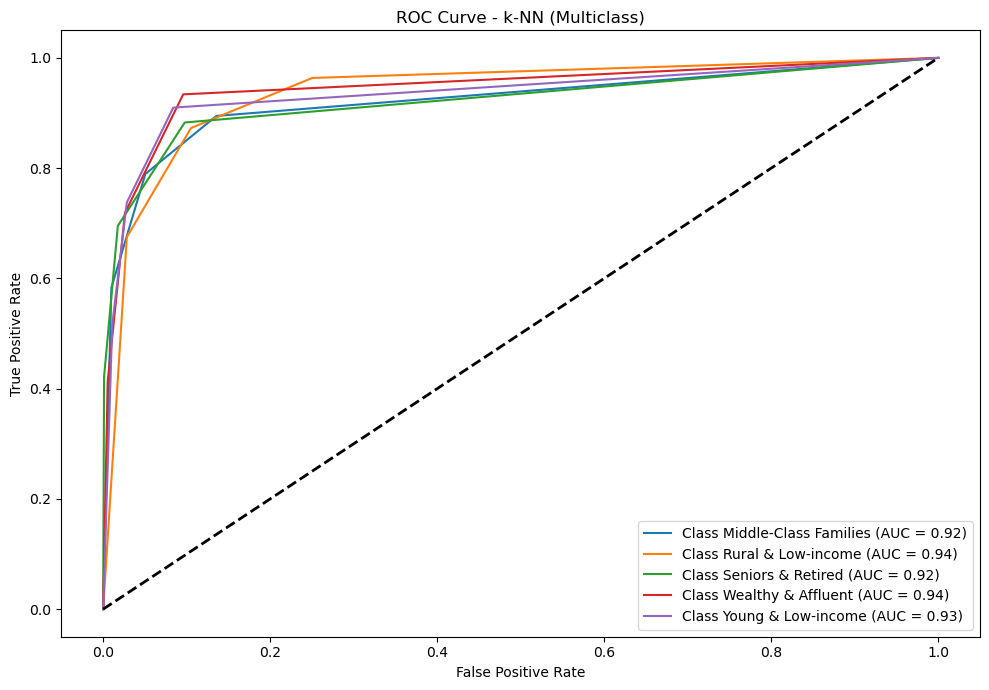

In [480]:
# Predict probabilities for ROC
y_score = best_knn.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {target_le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - k-NN (Multiclass)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve.png') 

##### 3.3.3. SVC (experiment with balancing the data)

##### Step 1: Train SVC with class balancing

In [416]:
svc_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)


#### 3.4. Comparing classifiers side-by-side

In [414]:
# Comparison Table

results = {
    "Model": ["Decision Tree", "k-NN", "SVC"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svc)
    ],
    "Precision (macro)": [
        precision_score(y_test, y_pred_dt, average='macro'),
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_svc, average='macro')
    ],
    "Recall (macro)": [
        recall_score(y_test, y_pred_dt, average='macro'),
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_svc, average='macro')
    ],
    "F1 Score (macro)": [
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_svc, average='macro')
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(results)

# Display
print(comparison_df)

           Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Decision Tree  0.980751           0.970596        0.976653   
1           k-NN  0.813282           0.802829        0.772622   
2            SVC  0.969201           0.955449        0.962843   

   F1 Score (macro)  
0          0.973272  
1          0.785708  
2          0.958711  


#### 3.5. Feature importance (tree models)


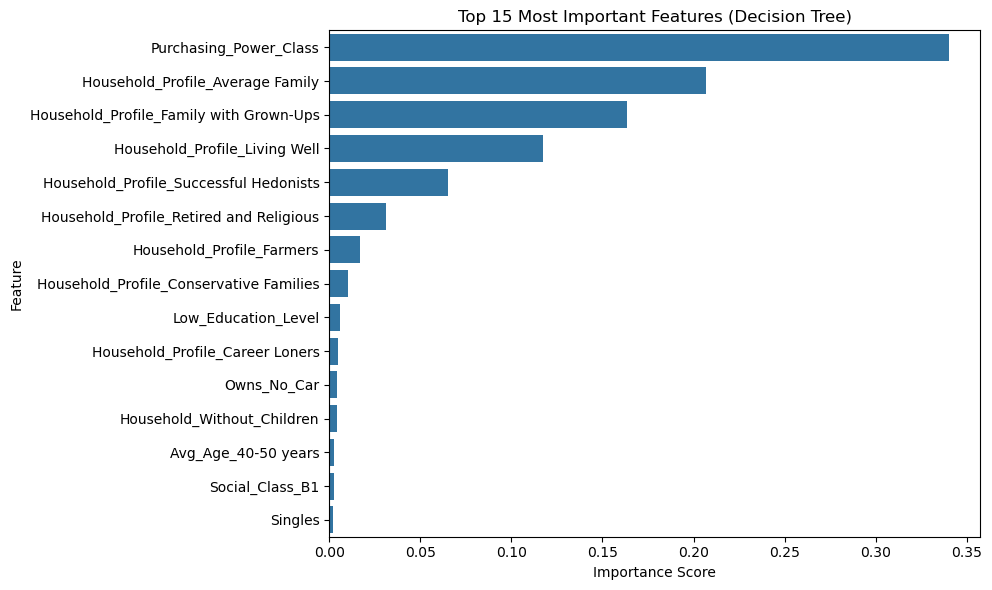

In [522]:
# Step 1: sort feature importances
importances = dt_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Step 8: plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top 15 Most Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('important_features.png') 

### TASK 4.  UNSUPERVISED LEARNING USING CLUSTERING ALGORITHMS

#### 4.1. Save and remove the target column

In [485]:
true_labels = data_encoded["Customer_Type"]
X = data_encoded.drop(columns=["Customer_Type"])

#### 4.2. K-Means clustering

##### Step 1: Apply k-Means with 5 clusters

In [494]:
k_means = KMeans(n_clusters=5, random_state=42)
clusters = k_means.fit_predict(X)

##### Step 2: Save cluster for evaluation

In [497]:
X_cluster = X.copy()
X_cluster["Cluster"] = clusters
X_cluster["True_label"] = true_labels

#### 4.3. Elbow Method

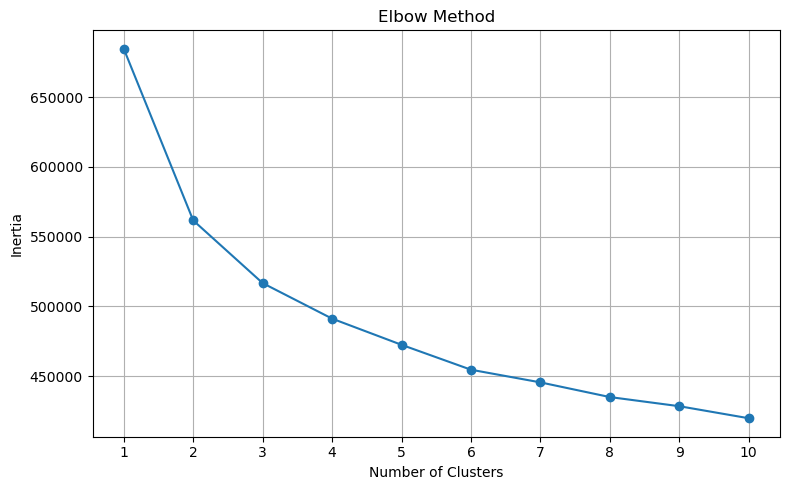

In [512]:
# Step 1: Apply the elbow mwthod 
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Step 2: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow.png') 

#### 4.4. Visualize Clusters Using t-SNE

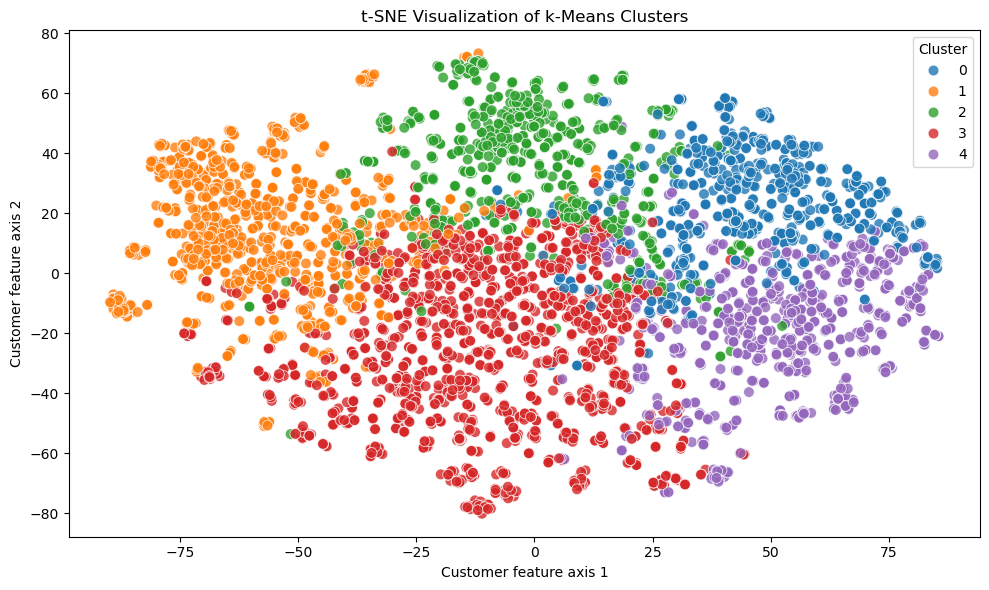

In [504]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_final = tsne.fit_transform(X)

# Add t-SNE to dataframe
X_cluster["TSNE1"] = tsne_final[:, 0]
X_cluster["TSNE2"] = tsne_final[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_cluster, x="TSNE1", y="TSNE2", hue="Cluster", palette="tab10", s=60, alpha=0.8)
plt.title("t-SNE Visualization of k-Means Clusters")
plt.xlabel("Customer feature axis 1")
plt.ylabel("Customer feature axis 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig('tSNE.png') 